# ***Brain Tumor Prediction Using Naive Bayes***

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset


In [2]:
df = pd.read_csv(r"E:\DATASETS\Brain-tumor-detection.csv",usecols=[1,2,3,4,5,6,7,8,9]) #usecol parameter will select only which useful to analysis

In [3]:
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 241 non-null    float64
 1   Perimeter            241 non-null    float64
 2   Convex Area          241 non-null    float64
 3   Solidity             241 non-null    float64
 4   Equivalent Diameter  241 non-null    float64
 5   Major Axis           241 non-null    float64
 6   Minor Axis           241 non-null    float64
 7   Eccentricity         241 non-null    object 
 8   Class                241 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 17.1+ KB


In [5]:
#missing values detection
df.isna().sum()

Area                   0
Perimeter              0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
Eccentricity           0
Class                  0
dtype: int64

In [6]:
#duplicate values detection 
df.duplicated().sum()


51

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
#Typecasting 

df['Eccentricity'] = df['Eccentricity'].astype('complex')
df.Class = df.Class.astype('object')
print(df.dtypes)

Area                      float64
Perimeter                 float64
Convex Area               float64
Solidity                  float64
Equivalent Diameter       float64
Major Axis                float64
Minor Axis                float64
Eccentricity           complex128
Class                      object
dtype: object


In [9]:
#structural errors
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [10]:
df['eccentricity'] = df['eccentricity'].apply(lambda x: abs(x))

In [11]:
df['eccentricity'] = df['eccentricity'].astype('float')

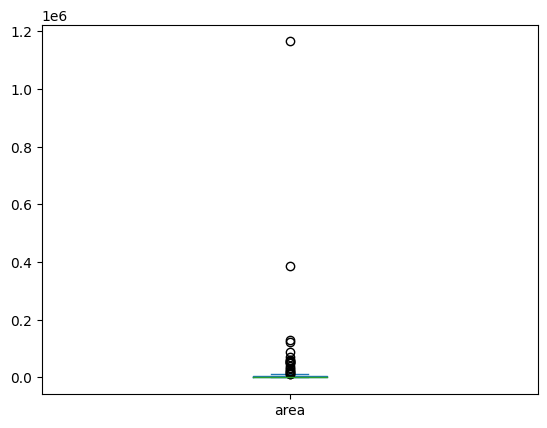

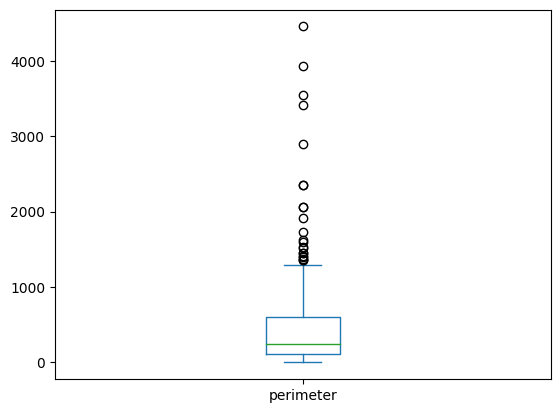

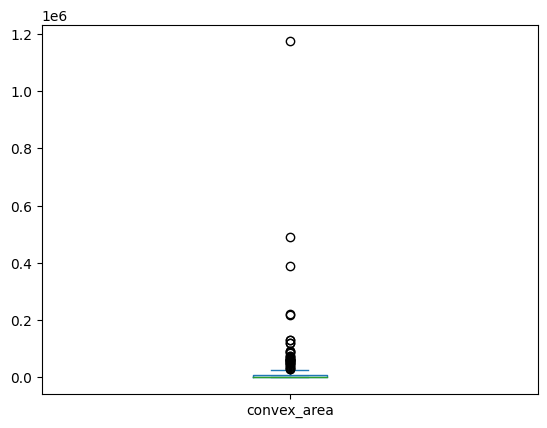

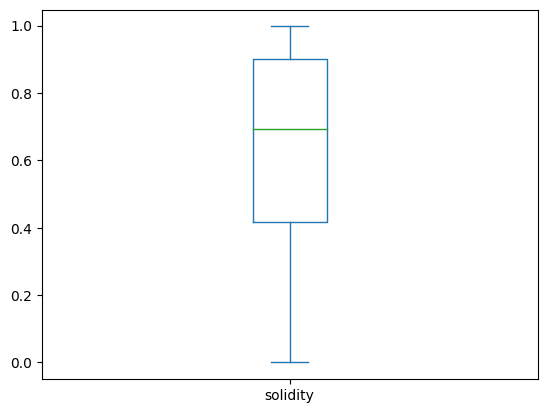

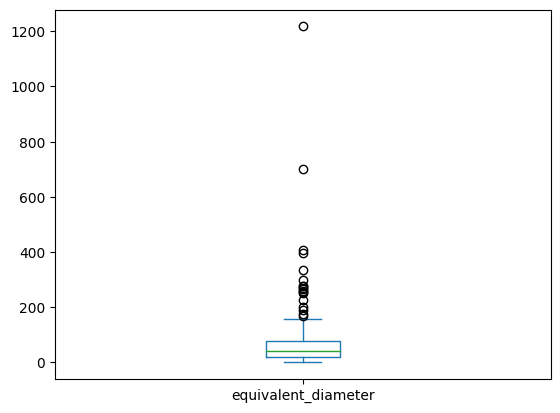

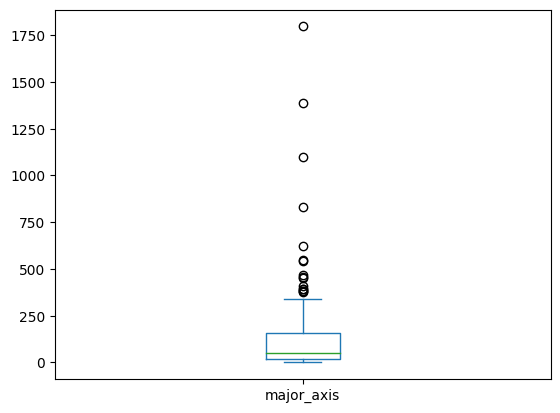

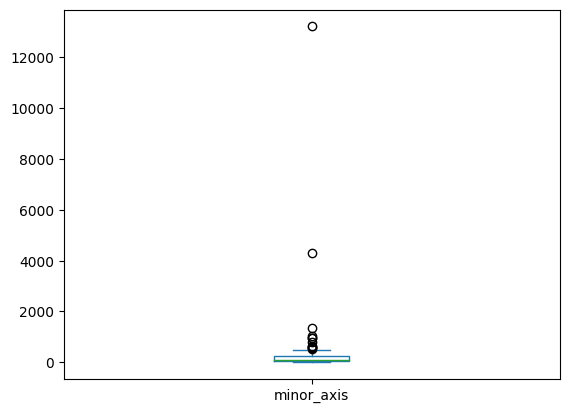

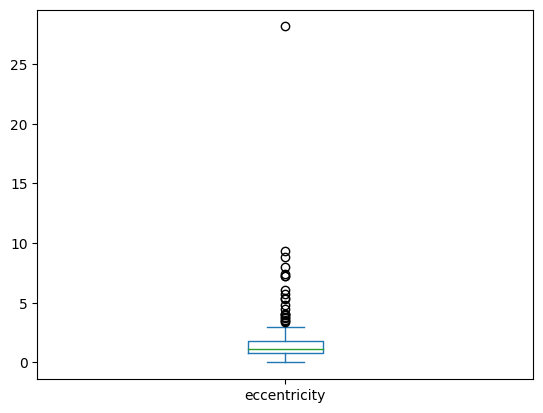

In [12]:
#outliers
for i in df.select_dtypes(exclude=['object']).columns:
    df[i].plot.box()
    plt.show()

Area:

    Small tumor: 50 square millimeters
    Large tumor: 5000 square millimeters
    
Perimeter:

    Irregularly shaped tumor: 30 millimeters
    Circular tumor: 100 millimeters
Convex Area:

    Small, irregular tumor: 40 square millimeters
    Large, more convex tumor: 3000 square millimeters
Solidity:

    Compact, solid tumor: 0.9
    More irregular, less solid tumor: 0.6
Equivalent Diameter:

    Small tumor: 10 millimeters
    Large tumor: 80 millimeters
Major Axis and Minor Axis:

    Elongated tumor: Major Axis - 40 millimeters, Minor Axis - 20 millimeters
    Circular tumor: Major Axis - 30 millimeters, Minor Axis - 30 millimeters

area


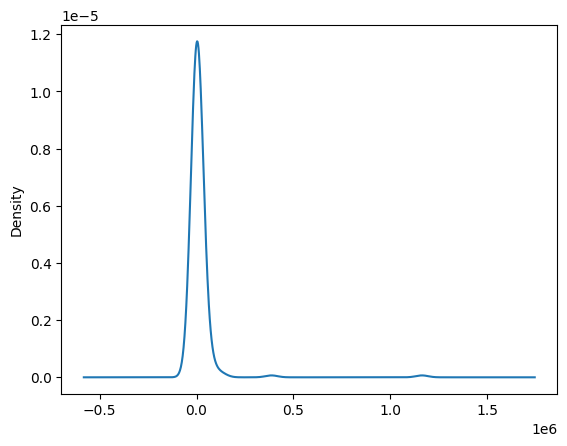

perimeter


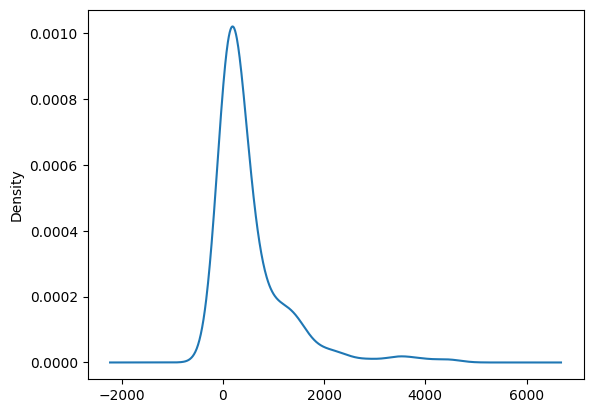

convex_area


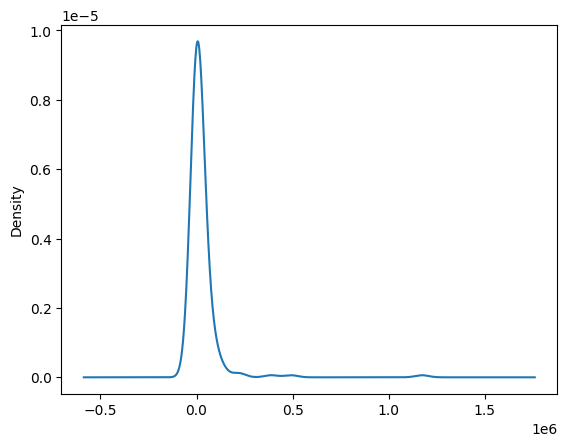

solidity


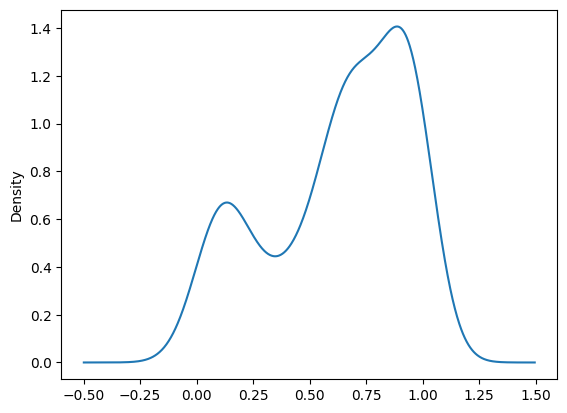

equivalent_diameter


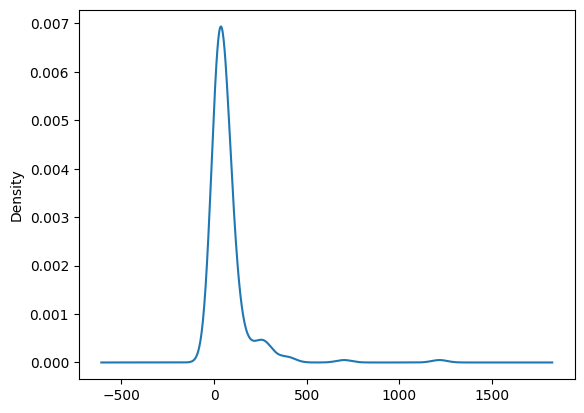

major_axis


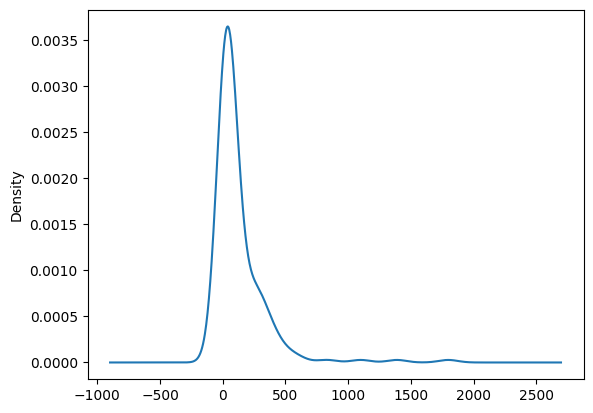

minor_axis


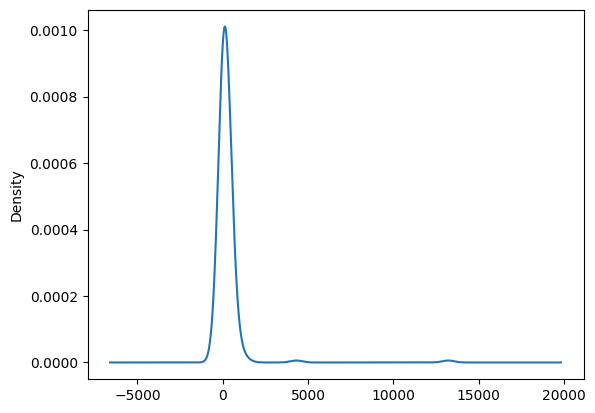

eccentricity


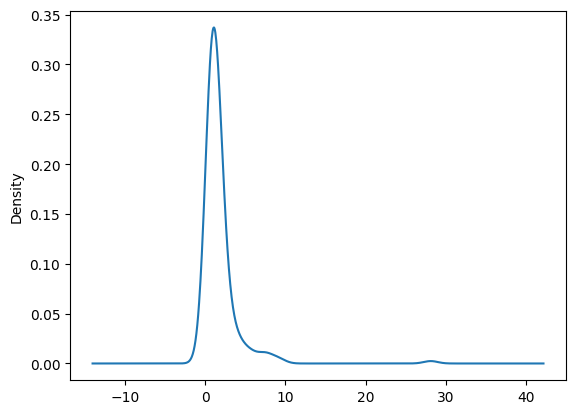

In [13]:
#outliers
for i in df.select_dtypes(exclude=['object']).columns:
    print(i)
    df[i].plot.kde()
    plt.show()

In [14]:
df['class'] = df['class'].map({1 :"Tumor detected", 0: "No tumor detected"})

## Data Preprocessing

### Feature Selection

In [15]:
df = df.drop(['major_axis','minor_axis'],axis=1) #these columns columns are not useful to analysis because combination these two columns is eccentricity

In [16]:
df

,area,perimeter,convex_area,solidity,equivalent_diameter,eccentricity,class
0,6314.5,521.972649,9855.5,0.640708,89.665328,1.378312,Tumor detected
1,52776.5,1189.820409,59947.0,0.880386,259.224086,1.658266,Tumor detected
2,50232.5,1415.349410,69628.5,0.721436,252.899200,1.335325,Tumor detected
3,4486.0,275.622365,4741.5,0.946114,75.576138,1.030671,Tumor detected
4,145.0,92.083260,323.5,0.448223,13.587484,1.388168,Tumor detected
...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,2.013375,No tumor detected
237,902.0,232.166520,1444.5,0.624438,33.888967,1.800646,No tumor detected
238,3177.0,217.681239,3260.0,0.974540,63.600959,0.296509,No tumor detected
239,6103.0,1208.631593,51259.5,0.119061,88.150899,0.206967,No tumor detected


<Axes: >

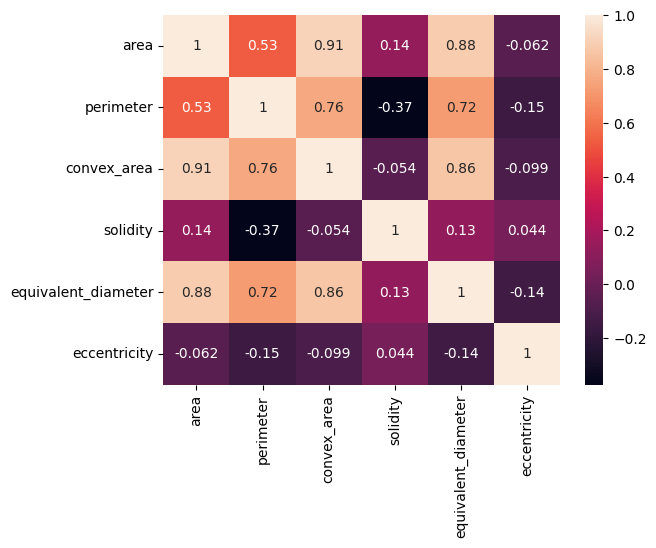

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Splitting the data into input and output features

In [18]:
X = df.drop('class',axis=1)
y = df['class']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler ,MinMaxScaler, PowerTransformer,StandardScaler,MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
num_col = X_train.select_dtypes(exclude='object').columns

In [22]:
num_trans = Pipeline(steps=[('Scaler',RobustScaler()),
               ("transformation",PowerTransformer())])

In [23]:
preprocess = ColumnTransformer([('Step 1',num_trans,num_col)
                  ])



In [24]:
pipe = Pipeline([('Preprocess',preprocess),
         ('Model',GaussianNB())])

In [25]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(transformers=[('Step 1',
                                                  Pipeline(steps=[('Scaler',
                                                                   RobustScaler()),
                                                                  ('transformation',
                                                                   PowerTransformer())]),
                                                  Index(['area', 'perimeter', 'convex_area', 'solidity', 'equivalent_diameter',
       'eccentricity'],
      dtype='object'))])),
                ('Model', GaussianNB())])

In [26]:
y_pred = pipe.predict(X_test)

In [41]:
n = np.array([7465.0,1921.214415,130247.0,0.057314,97.492221,0.594490])
numeric_features = ['area', 'perimeter', 'convex_area', 'solidity', 'equivalent_diameter', 'eccentricity']
n_df = pd.DataFrame([n], columns=numeric_features)

pipe.predict(n_df)

array(['Tumor detected'], dtype='<U17')

In [42]:
import pickle
with open('gaussian_brain.pkl', 'wb') as model_file:
    pickle.dump(pipe, model_file)

In [29]:
X_test

,area,perimeter,convex_area,solidity,equivalent_diameter,eccentricity
224,7465.0,1921.214415,130247.0,0.057314,97.492221,0.594490
229,1006.0,231.622364,1588.5,0.633302,35.789370,4.078270
128,1825.0,822.808217,24851.5,0.073436,48.204379,0.526581
71,1750.5,241.865005,2414.5,0.724995,47.210230,1.244330
115,10929.5,562.943213,13080.0,0.835589,117.965553,1.162931
15,2111.0,388.617314,4407.5,0.478956,51.844080,1.261558
9,12913.0,1399.307779,25064.5,0.515191,128.223797,1.142527
16,6403.5,1622.319972,91829.5,0.069732,90.295013,0.949815
170,307.5,219.036577,1059.0,0.290368,19.786894,2.008338
145,104.5,42.727922,109.0,0.958716,11.534883,1.433137


In [30]:
X_train


,area,perimeter,convex_area,solidity,equivalent_diameter,eccentricity
211,61.5,31.899495,65.5,0.938931,8.848968,0.860512
31,10355.0,473.587874,11766.0,0.880078,114.823323,0.938122
195,57177.0,912.607209,57611.0,0.992467,269.814784,0.880179
12,395.0,76.083260,408.5,0.966952,22.426092,0.415616
44,646.0,218.994947,1071.5,0.602893,28.679483,0.334688
...,...,...,...,...,...,...
121,6127.0,365.161468,6983.0,0.877417,88.324055,0.744808
14,1160.5,203.580734,1674.0,0.693250,38.439491,2.387821
103,331.0,135.195958,798.5,0.414527,20.529060,1.513443
228,565.5,190.953318,1225.5,0.461444,26.833132,0.632852


In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [32]:
accuracy_score(y_test,y_pred)

0.7291666666666666

In [33]:
confusion_matrix(y_test,y_pred)

array([[ 8,  4],
       [ 9, 27]], dtype=int64)

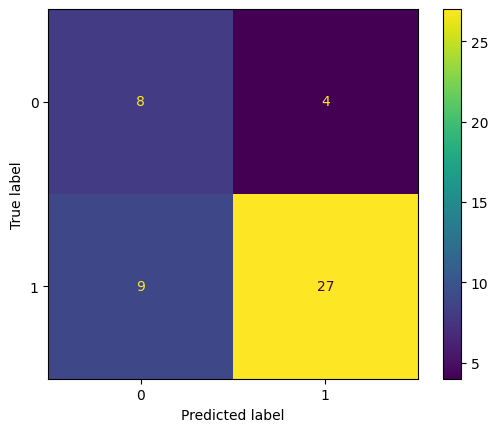

In [34]:
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = Pipeline([('Preprocess',preprocess),
         ('Model',KNeighborsClassifier())])    

In [37]:
knn.fit(X_train,y_train)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(transformers=[('Step 1',
                                                  Pipeline(steps=[('Scaler',
                                                                   RobustScaler()),
                                                                  ('transformation',
                                                                   PowerTransformer())]),
                                                  Index(['area', 'perimeter', 'convex_area', 'solidity', 'equivalent_diameter',
       'eccentricity'],
      dtype='object'))])),
                ('Model', KNeighborsClassifier())])

In [38]:
y_pred = knn.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred)

0.7708333333333334

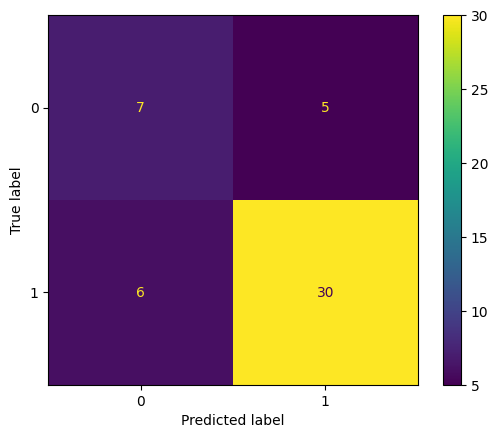

In [40]:
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()